In [24]:
import torch
from nets import CTNet, GAPNet
import networkx as nx

import torch.nn.functional as F
from torch_geometric.loader import DataLoader
from torch_geometric.utils import *
from transform_features import FeatureDegree
from torch_geometric.datasets import TUDataset

In [25]:
dataset = TUDataset(root='data_colab/TUDataset',name="REDDIT-BINARY", pre_transform=FeatureDegree(), use_node_attr=True)
dataset = dataset.shuffle()
BATCH_SIZE = 64
num_of_centers = 420

"""dataset = TUDataset(root='data_colab/TUDataset',name="MUTAG")
BATCH_SIZE = 32
num_of_centers = 17"""
dataset[0]

Data(edge_index=[2, 2376], y=[1], x=[1041, 1], num_nodes=1041)

In [26]:

dataset[0].edge_index#Tensor de [2,num_concexiones], 
                     #la primera fila es el nodo a y la segunda es el nodo b al que se conecta

tensor([[   0,    0,    1,  ..., 1038, 1039, 1040],
        [ 377,  701,  701,  ...,  701,  701,  701]])

In [27]:
dataset[0].y

tensor([0])

In [28]:
dataset[0].edge_index[1].shape

torch.Size([2376])

In [29]:
dataset[0].x[0]

tensor([2.])

936
815
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 2

AttributeError: module 'scipy.sparse' has no attribute 'coo_array'

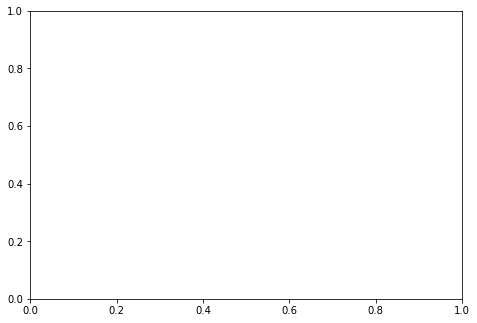

In [123]:
A = to_networkx(dataset[13], to_undirected=True)
print(len(A.edges))
print(len(A.nodes))
print(A.nodes)
nx.draw(A)

In [124]:
l=[]
for a in A.nodes:
    l.append(a)

In [125]:
ed= []
for e in A.edges:
    ed.append(e)

In [126]:
import igraph as ig
import chart_studio.plotly
Edges= ed
G=ig.Graph(Edges, directed=False)
labels= l
#groups = A.node_attr_dict_factory
N = len(A.nodes)
layt=G.layout('kk', dim=3)
print(layt)
Xn=[layt[k][0] for k in range(N)]# x-coordinates of nodes
Yn=[layt[k][1] for k in range(N)]# y-coordinates
Zn=[layt[k][2] for k in range(N)]# z-coordinates
Xe=[]
Ye=[]
Ze=[]
for e in Edges:
    Xe+=[layt[e[0]][0],layt[e[1]][0], None]# x-coordinates of edge ends
    Ye+=[layt[e[0]][1],layt[e[1]][1], None]
    Ze+=[layt[e[0]][2],layt[e[1]][2], None]

<Layout with 815 vertices and 3 dimensions>


In [127]:
from chart_studio import plotly
import plotly.graph_objs as go

trace1=go.Scatter3d(x=Xe,
               y=Ye,
               z=Ze,
               mode='lines',
               line=dict(color='rgb(125,125,125)', width=1),
               hoverinfo='none'
               )

trace2=go.Scatter3d(x=Xn,
               y=Yn,
               z=Zn,
               mode='markers',
               name='actors',
               marker=dict(symbol='circle',
                             size=6,
                             color='#ff7f0e',
                             colorscale='Viridis',
                             line=dict(color='rgb(50,50,50)', width=0.5)
                             ),
               text=labels,
               hoverinfo='text'
               )

axis=dict(showbackground=False,
          showline=False,
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title=''
          )

layout = go.Layout(
         title="3D graph visualization of ReddEdit-binary dataset  by : Ahmed",
         width=1000,
         height=1000,
         showlegend=False,
         scene=dict(
             xaxis=dict(axis),
             yaxis=dict(axis),
             zaxis=dict(axis),
        ),
     margin=dict(
        t=100
    ),
    hovermode='closest',
    annotations=[
           dict(
           showarrow=False,
            text="Data source: <a href='https://plotly.com/python/v3/3d-network-graph/</a>",
            xref='paper',
            yref='paper',
            x=0,
            y=0.1,
            xanchor='left',
            yanchor='bottom',
            font=dict(
            size=14
            )
            )
        ],    )

47
27
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


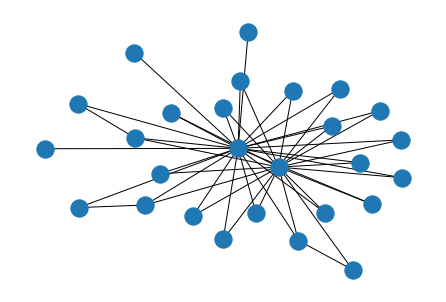

In [128]:
A = to_networkx(dataset[11], to_undirected=True)
print(len(A.edges))
print(len(A.nodes))
print(A.nodes)
nx.draw(A)

In [129]:
import pandas as pd
import numpy as np
%matplotlib inline
import plotly.graph_objs as go
from  plotly.offline import plot
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline()
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected='true')
data=[trace1, trace2]
fig=go.Figure(data=data, layout=layout)

iplot(fig, filename='Les-Miserables')